## Домашняя работа 4.

Максимальный балл за задание - 10.

## Данные


В этой домашней работе мы будем обучать модели машинного обучения, ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week

Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

В задании мы будем оценивать качество моделей с помощью метрики AUC-ROC.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать:

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/kh11vika/Downloads/data.adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказызвается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

В данном датасете пропущенные значения обозначены как "?".

**Задание 1 (0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [31]:
df.replace('?', np.nan, inplace=True)
null_values = df.isnull().sum() #находим, где есть пустые значения
null_values

age                 0
workclass         929
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        933
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64

In [32]:
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [33]:
df.isnull().sum() #проверочка

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем:

 - Выделите целевую переменную в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными. В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [34]:
df['target'] = df['>50K,<=50K'].map({">50K": 1, "<=50K": 0})
df = df.drop(columns=[">50K,<=50K"])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,0
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,0
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,0
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,0
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,1


In [35]:
df.info() #все числпвые данные типа int64

<class 'pandas.core.frame.DataFrame'>
Index: 15347 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15347 non-null  int64 
 1   workclass       15347 non-null  object
 2   fnlwgt          15347 non-null  int64 
 3   education       15347 non-null  object
 4   education-num   15347 non-null  int64 
 5   marital-status  15347 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    15347 non-null  object
 8   race            15347 non-null  object
 9   sex             15347 non-null  object
 10  capital-gain    15347 non-null  int64 
 11  capital-loss    15347 non-null  int64 
 12  hours-per-week  15347 non-null  int64 
 13  target          15347 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.8+ MB


In [36]:
new_df = df.select_dtypes(include=['int64'])
new_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
0,34,284843,9,594,0,60,0
1,40,190290,10,0,0,40,0
2,36,177858,13,0,0,40,0
3,22,184756,10,0,0,30,0
4,47,149700,13,15024,0,40,1


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 5 алгоритмов:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)

Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**Задание 2 (1 балл)** Для каждого из первых трех алгоритмов подберите оптимальные значения указанных гиперпараметров. Для каждого из этих алгоритмов постройте график среднего качества по кросс-валидации при заданном значении гиперпараметра, на котором также отобразите доверительный интервал [m-std, m+std], где m - среднее, std - стандартное отклонение.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss



X = new_df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = df['target']

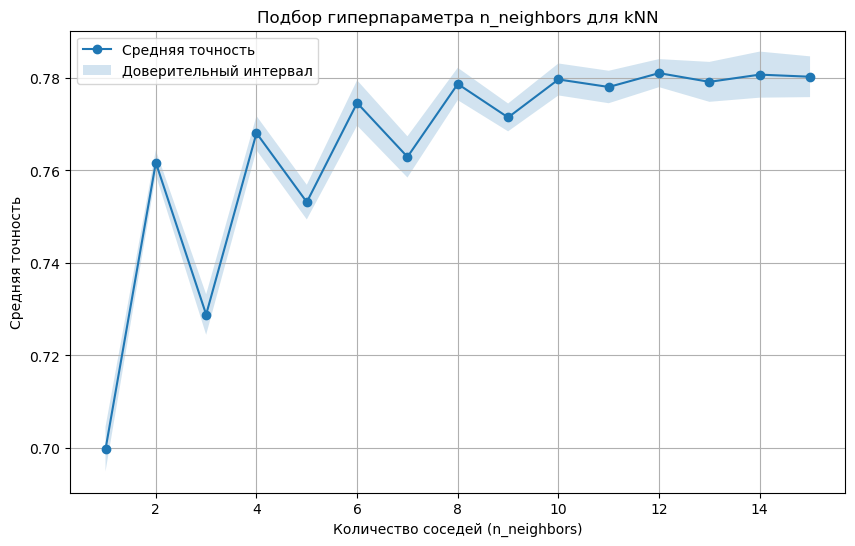

In [38]:
#создаем модель kNN
knn = KNeighborsClassifier() 
param_grid = {'n_neighbors': np.arange(1, 16)} #я попробовала разные значения, но как будто больше 15 уже точность стабилизируется
cv = KFold(n_splits=5, shuffle=True, random_state=16) #я просто люблю число 16

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

#получение результатов GridSearchCV
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], mean_scores, marker='o', label='Средняя точность')
plt.fill_between(param_grid['n_neighbors'], mean_scores - std_scores, mean_scores + std_scores, alpha=0.2, label='Доверительный интервал')

plt.title('Подбор гиперпараметра n_neighbors для kNN')
plt.xlabel('Количество соседей (n_neighbors)')
plt.ylabel('Средняя точность')
plt.legend()
plt.grid(True)
plt.show()

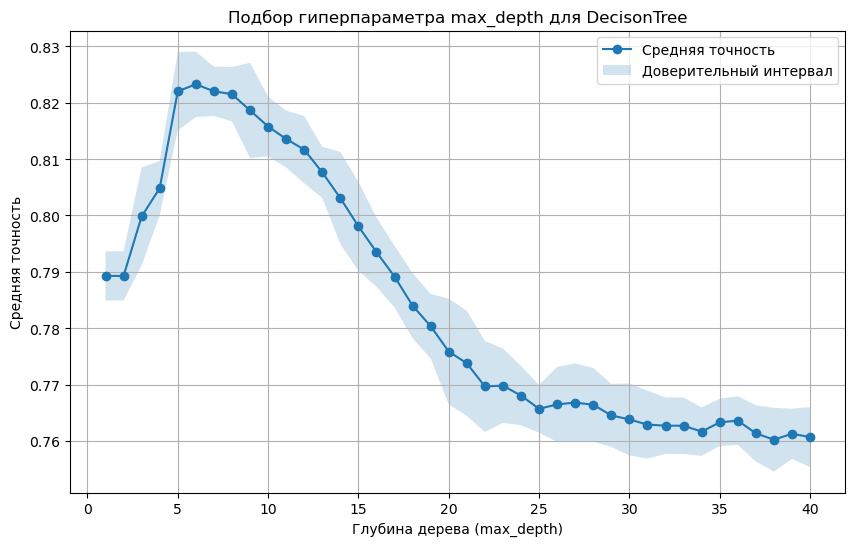

In [39]:
#создаем модель DecisonTree
dt = DecisionTreeClassifier(random_state=16)

param_grid = {'max_depth': np.arange(1, 41)} #я попробовала разные значения, но как будто больше 40 больше не меняет точность модели
cv = KFold(n_splits=5, shuffle=True, random_state=16) 

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

#получение результатов GridSearchCV
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_scores, marker='o', label='Средняя точность')
plt.fill_between(param_grid['max_depth'], mean_scores - std_scores, mean_scores + std_scores, alpha=0.2, label='Доверительный интервал')

plt.title('Подбор гиперпараметра max_depth для DecisonTree')
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('Средняя точность')
plt.legend()
plt.grid(True)
plt.show()

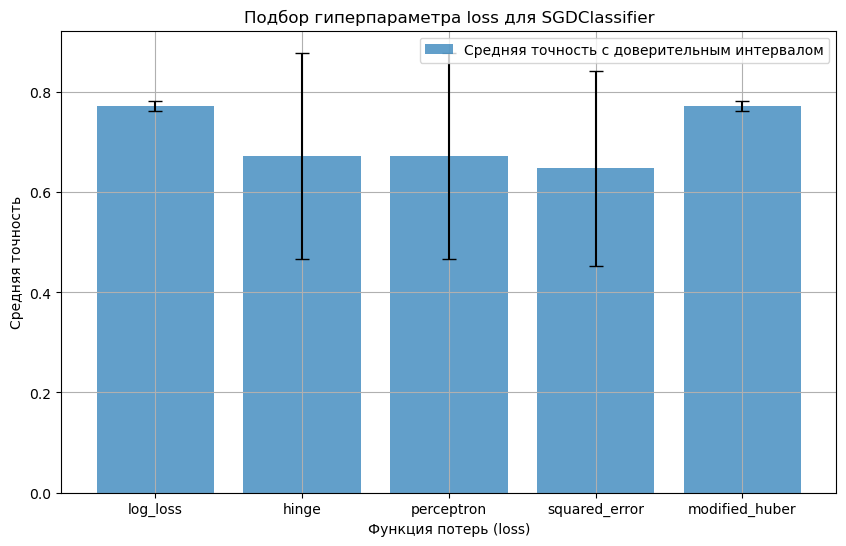

In [40]:
#создаем модель SGDClassifier
sgd = SGDClassifier(random_state=16)

param_grid = {'loss': ['log_loss', 'hinge', 'perceptron', 'squared_error', 'modified_huber']} #
cv = KFold(n_splits=5, shuffle=True, random_state=16)  

grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

#получение результатов GridSearchCV
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.bar(param_grid['loss'], mean_scores, yerr=std_scores, alpha=0.7, capsize=5, label='Средняя точность с доверительным интервалом')

plt.title('Подбор гиперпараметра loss для SGDClassifier')
plt.xlabel('Функция потерь (loss)')
plt.ylabel('Средняя точность')
plt.legend()
plt.grid(True)
plt.show()

Что вы можете сказать о получившихся графиках?

**модель kNN**: Когда количество соседей маленькое, модель слишком чувствительная к шуму в данных, это приводит к колебаниям точности. После 12 числа соседей точность стабилизируется (увеличение числа соседей больше не приносит значительного улучшения в точности).

**модель DecisonTree**: Оптимальная глубина дерева около 5 (точность максимальна). При увеличении глубины точность начинает падать из-за переобучения, а после глубины 40 стабилизируется (слишком глубокие деревья начинают терять способность эффективно обрабатывать данные и слишком подстраиваются под шум). 

**модель SGDClassifier**: Максимальная точность достигается при использовании функции потерь log_loss (которая эквивалентна логистической регрессии) и modified huber, что указывает на хорошее поведение модели для задач классификации с вероятностными выходами. 

**Задание 3 (0.5 балла)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

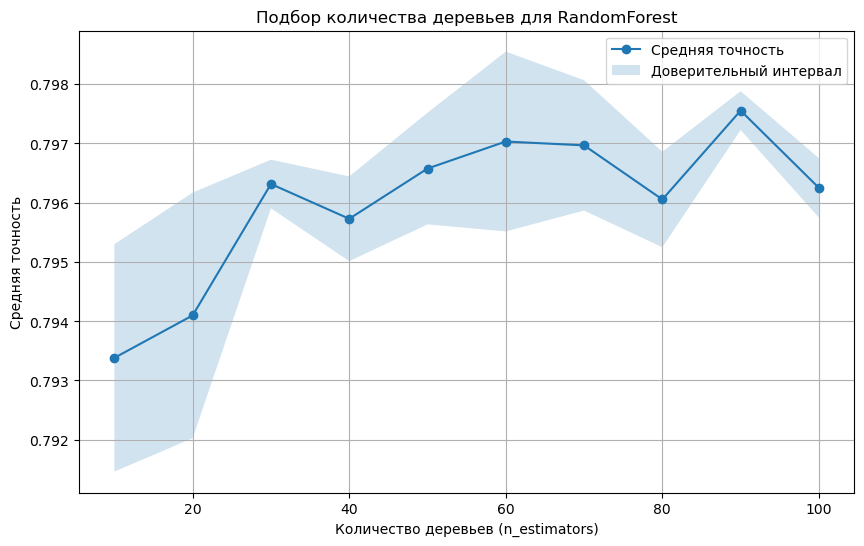

In [42]:
#обучение модели с максимальным количеством деревьев
max_trees = 100
rf = RandomForestClassifier(n_estimators=max_trees, random_state=16, n_jobs=-1)
rf.fit(X, y)

n_estimators_range = np.arange(10, max_trees + 1, 10)

mean_scores = []
std_scores = []

#оценка качества для подмножества деревьев
for n_estimators in n_estimators_range:
    sub_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=16, n_jobs=-1)
    scores = cross_val_score(sub_rf, X, y, cv=3, scoring='accuracy', n_jobs=-1)  #использую 3 фолда для большей скорости, с 5 грузился миллион лет
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', label='Средняя точность')
plt.fill_between(n_estimators_range, np.array(mean_scores) - np.array(std_scores),
                 np.array(mean_scores) + np.array(std_scores), alpha=0.2, label='Доверительный интервал')

plt.title('Подбор количества деревьев для RandomForest')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Средняя точность')
plt.legend()
plt.grid(True)
plt.show()

**Задание 4 (0.5 балла)** Подберём число деревьев (*n_estimators*) в алгоритме GradientBoosting. Мы знаем, что ошибка бустинга на тестовых данных, как правило, имеет U-образную форму, то есть сначала уменьшается, а при достижении некоторого числа деревьев начинает расти. Нарисуйте график ошибки в зависимости от числа деревьев. Подберите n_estimators, соответствующий минимуму ошибки.

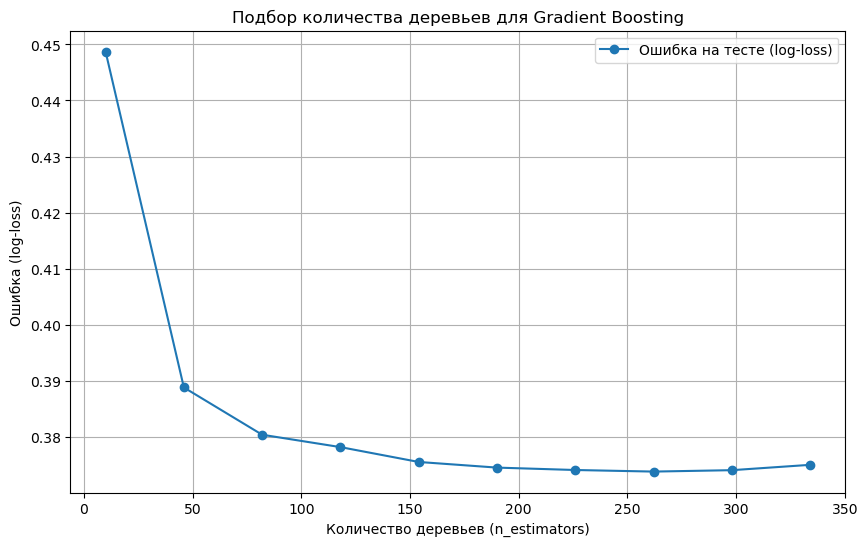

Оптимальное количество деревьев: 262


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

n_estimators_range = np.arange(10, 351, 36) #много значений перепробовала, чтобы на графике был виден минимум, и код не выполнялся три часа
test_errors = []

#обучение GradientBoostingClassifier и подсчёт ошибки
for n_estimators in n_estimators_range:
    gb = GradientBoostingClassifier(n_estimators=n_estimators, random_state=16)
    gb.fit(X_train, y_train)
    y_pred_proba = gb.predict_proba(X_test)
    test_errors.append(log_loss(y_test, y_pred_proba))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, test_errors, marker='o', label='Ошибка на тесте (log-loss)')
plt.title('Подбор количества деревьев для Gradient Boosting')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Ошибка (log-loss)')
plt.legend()
plt.grid(True)
plt.show()

optimal_n_estimators = n_estimators_range[np.argmin(test_errors)]
print(f'Оптимальное количество деревьев: {optimal_n_estimators}')

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**Задание 5 (0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*. Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

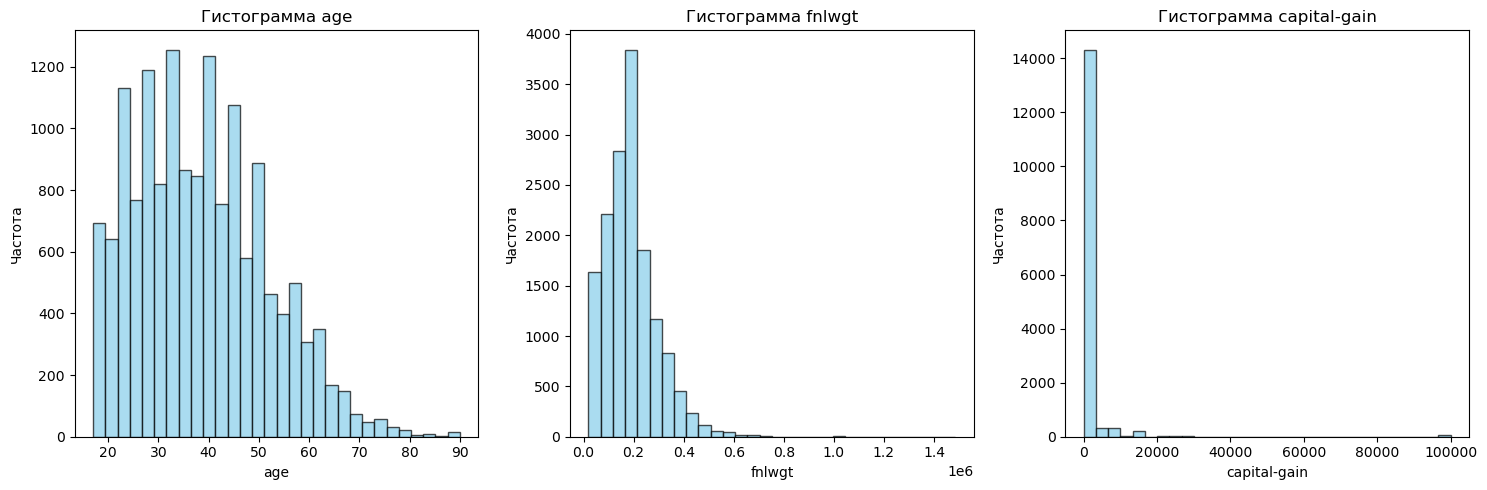

In [44]:
features = ['age', 'fnlwgt', 'capital-gain']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.hist(new_df[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Гистограмма {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Для kNN и SGDClassifier масштабирование признаков очень важно, так как эти алгоритмы зависят от вычисления расстояний или градиентного спуска.

Для DecisionTree, RandomForest и GradientBoosting масштабирование не имеет существенного значения, потому что они используют методы, основанные на разделении данных, и не зависят от расстояний между признаками.

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

**Задание 6 (1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
X_scaled_df = pd.DataFrame(X_scaled, columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

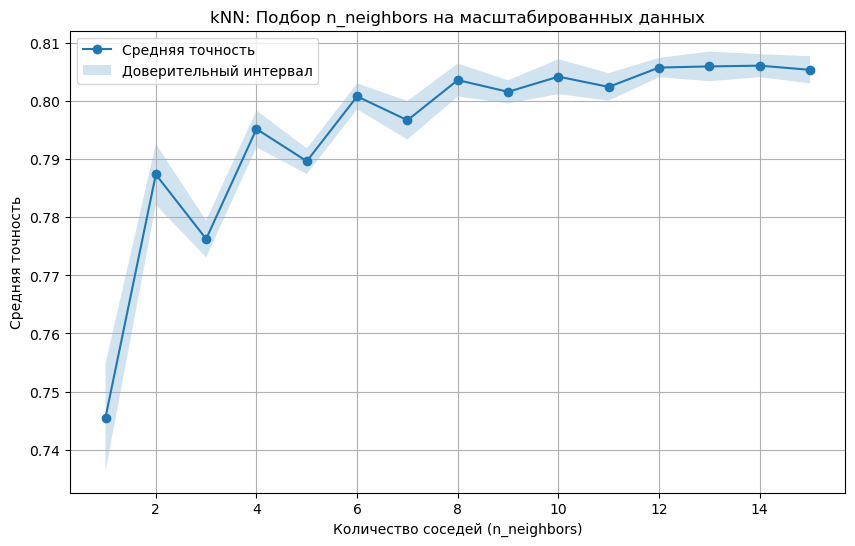

Оптимальное n_neighbors для kNN: 14


In [46]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': np.arange(1, 16)}

cv = KFold(n_splits=5, shuffle=True, random_state=16)

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_scaled, y)

results_knn = grid_search_knn.cv_results_
mean_scores_knn = results_knn['mean_test_score']
std_scores_knn = results_knn['std_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid_knn['n_neighbors'], mean_scores_knn, marker='o', label='Средняя точность')
plt.fill_between(param_grid_knn['n_neighbors'], mean_scores_knn - std_scores_knn, mean_scores_knn + std_scores_knn, alpha=0.2, label='Доверительный интервал')
plt.title('kNN: Подбор n_neighbors на масштабированных данных')
plt.xlabel('Количество соседей (n_neighbors)')
plt.ylabel('Средняя точность')
plt.legend()
plt.grid(True)
plt.show()

optimal_knn = grid_search_knn.best_params_['n_neighbors']
print(f"Оптимальное n_neighbors для kNN: {optimal_knn}")

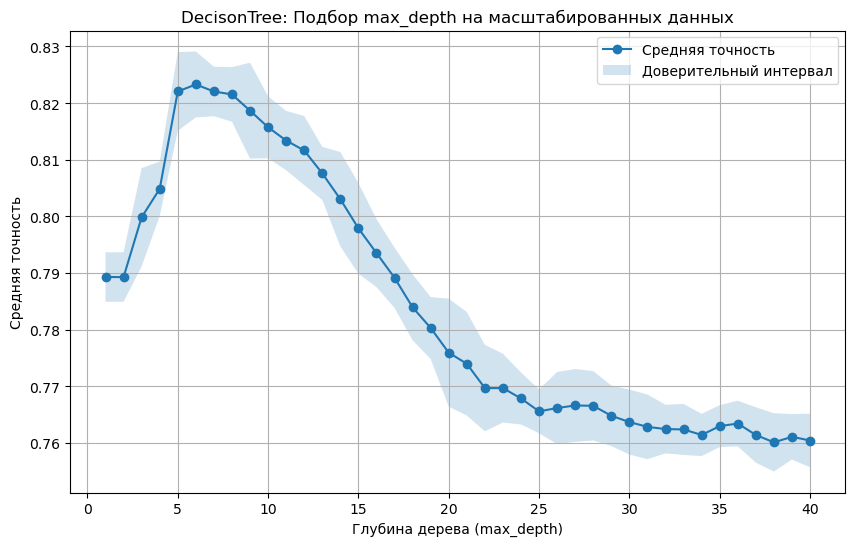

Оптимальное n_neighbors для DecisonTree: 6


In [47]:
dt = DecisionTreeClassifier(random_state=16)

param_grid = {'max_depth': np.arange(1, 41)} 
cv = KFold(n_splits=5, shuffle=True, random_state=16) 

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_scores, marker='o', label='Средняя точность')
plt.fill_between(param_grid['max_depth'], mean_scores - std_scores, mean_scores + std_scores, alpha=0.2, label='Доверительный интервал')

plt.title('DecisonTree: Подбор max_depth на масштабированных данных')
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('Средняя точность')
plt.legend()
plt.grid(True)
plt.show()

optimal = grid_search.best_params_['max_depth']
print(f"Оптимальное n_neighbors для DecisonTree: {optimal}")

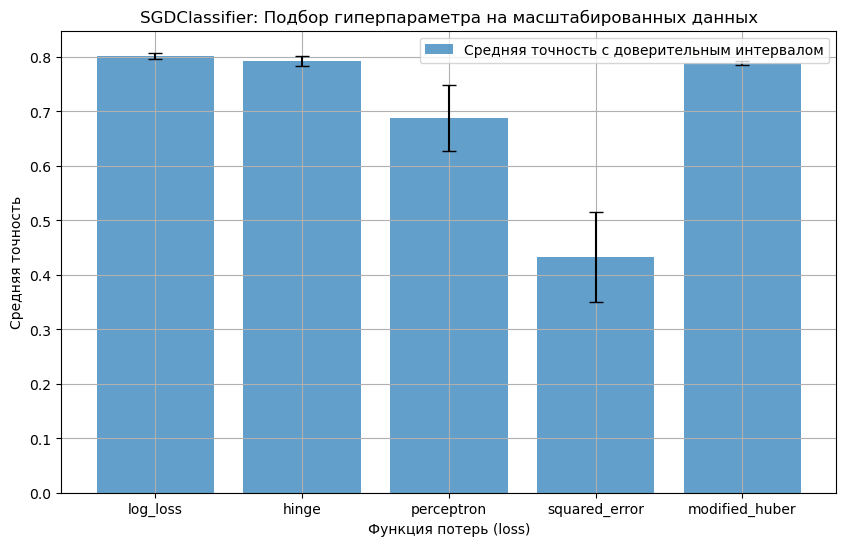

Оптимальное n_neighbors для DecisonTree: log_loss


In [20]:
sgd = SGDClassifier(random_state=16)

param_grid = {'loss': ['log_loss', 'hinge', 'perceptron', 'squared_error', 'modified_huber']} 
cv = KFold(n_splits=5, shuffle=True, random_state=16)  

grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

#получение результатов GridSearchCV
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.bar(param_grid['loss'], mean_scores, yerr=std_scores, alpha=0.7, capsize=5, label='Средняя точность с доверительным интервалом')

plt.title('SGDClassifier: Подбор гиперпараметра на масштабированных данных')
plt.xlabel('Функция потерь (loss)')
plt.ylabel('Средняя точность')
plt.legend()
plt.grid(True)
plt.show()

optimal = grid_search.best_params_['loss']
print(f"Оптимальное n_neighbors для DecisonTree: {optimal}")

Изменилось ли качество у некоторых алгоритмов?

Визуально изменение качества модели наблюдается только у SGDClassifier, где настройка гиперпараметров явно повлияла на точность. Для алгоритмов DecisionTree и RandomForest, качество осталось плюс-минус таким же.

**Задание 7 (1.25 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае:
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - GradientBoosting — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
#KNN 
knn_param_grid = {
    'n_neighbors': np.arange(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
knn_grid.fit(X, y)

#DecisionTree
dt_param_grid = {
    'max_depth': np.arange(1, 21),
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=16), dt_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
dt_grid.fit(X, y)

#RandomForest
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [1.0, 'sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=16),
    rf_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
rf_grid.fit(X, y)

#GradientBoosting 
gb_param_grid = {
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'max_features': [1.0, 'sqrt', 'log2']
}
gb_grid = GridSearchCV(GradientBoostingClassifier(n_estimators=100, random_state=16), gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid.fit(X, y)

#SGDClassifier 
sgd_param_grid = {
    'loss': ['hinge', 'log_loss', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet']
}
sgd_grid = GridSearchCV(SGDClassifier(random_state=16), sgd_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
sgd_grid.fit(X, y)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=16), n_jobs=-1,
             param_grid={'loss': ['hinge', 'log_loss', 'perceptron'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [50]:
print("KNN:")
print(f"Лучшие параметры: {knn_grid.best_params_}")
print(f"Лучшее качество: {knn_grid.best_score_:.4f}\n")

print("DecisionTree:")
print(f"Лучшие параметры: {dt_grid.best_params_}")
print(f"Лучшее качество: {dt_grid.best_score_:.4f}\n")

print("RandomForest:")
print(f"Лучшие параметры: {rf_grid.best_params_}")
print(f"Лучшее качество: {rf_grid.best_score_:.4f}\n")

print("GradientBoosting:")
print(f"Лучшие параметры: {gb_grid.best_params_}")
print(f"Лучшее качество: {gb_grid.best_score_:.4f}\n")

print("SGDClassifier:")
print(f"Лучшие параметры: {sgd_grid.best_params_}")
print(f"Лучшее качество: {sgd_grid.best_score_:.4f}\n")

KNN:
Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 12}
Лучшее качество: 0.7837

DecisionTree:
Лучшие параметры: {'criterion': 'gini', 'max_depth': 5}
Лучшее качество: 0.8209

RandomForest:
Лучшие параметры: {'criterion': 'entropy', 'max_features': 1.0}
Лучшее качество: 0.8009

GradientBoosting:
Лучшие параметры: {'criterion': 'friedman_mse', 'max_features': 1.0}
Лучшее качество: 0.8319

SGDClassifier:
Лучшие параметры: {'loss': 'hinge', 'penalty': 'l1'}
Лучшее качество: 0.7765



Какой из алгоритмов имеет наилучшее качество?

*Наилучшее качество имеет алгоритм GradientBoosting с результатом 0.8319.*


**Задание 8 (0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

In [51]:
import time

models = {
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=12),
    "DecisionTree": DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=16),
    "RandomForest": RandomForestClassifier(criterion='entropy', max_features=1.0, n_estimators=100, random_state=16),
    "GradientBoosting": GradientBoostingClassifier(criterion='friedman_mse', max_features=1.0, n_estimators=100, random_state=16),
    "SGDClassifier": SGDClassifier(loss='hinge', penalty='l1', random_state=16)
}

training_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X, y) 
    end_time = time.time()
    training_times[name] = end_time - start_time


for name, duration in training_times.items():
    print(f"{name}: {duration:.4f} секунд")

KNN: 0.0108 секунд
DecisionTree: 0.0383 секунд
RandomForest: 2.3539 секунд
GradientBoosting: 0.7473 секунд
SGDClassifier: 0.1367 секунд


Самый долгий алгоритм — RandomForest (2.36 сек). Это из-за обучения 100 деревьев, где каждое строится с бутстреп-выборкой и перебором всех признаков на каждом узле (это супер сложно и долго по сравнению с другими методами).

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков.

**Задание 9 (0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [52]:
new_df_2 = df.select_dtypes(include=['object'])
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
df_encoded = pd.get_dummies(new_df_2, columns=categorical_columns, drop_first=True)
df_encoded = df_encoded.replace({True: 1, False: 0})
df_encoded.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


**Задание 10 (0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [53]:
df_final = pd.concat([X_scaled_df, df_encoded], axis=1, join='inner') #сохраняет только те строки, которые присутствуют в обоих DataFrame (с помощью join='inner') без этого не работало, а подсказал мне ChatGPT
y = y[df_final.index]  #индексы y синхронизируются с индексами df_final, тоже ChatGPT помог
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,-0.342919,0.900258,-0.450788,-0.065600,-0.21874,1.588223,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0.114760,0.010683,-0.059086,-0.150439,-0.21874,-0.074178,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,-0.190359,-0.106280,1.116020,-0.150439,-0.21874,-0.074178,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,-1.258276,-0.041382,-0.059086,-0.150439,-0.21874,-0.905379,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.648719,-0.371197,1.116020,1.995391,-0.21874,-0.074178,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [57]:
#KNN
knn_best = KNeighborsClassifier(n_neighbors=12, metric='manhattan')
knn_score = cross_val_score(knn_best, df_final, y, cv=5, scoring='accuracy')
print(f"KNN accuracy: {knn_score.mean()}")

#DecisionTree
dt_best = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=16)
dt_score = cross_val_score(dt_best, df_final, y, cv=5, scoring='accuracy')
print(f"DecisionTree accuracy: {dt_score.mean()}")

#RandomForest
rf_best = RandomForestClassifier(criterion='entropy', max_features=1.0, n_estimators=100, random_state=16)
rf_score = cross_val_score(rf_best, df_final, y, cv=5, scoring='accuracy')
print(f"RandomForest accuracy: {rf_score.mean()}")

#GradientBoosting
gb_best = GradientBoostingClassifier(criterion='friedman_mse', max_features=1.0, n_estimators=100, random_state=16)
gb_score = cross_val_score(gb_best, df_final, y, cv=5, scoring='accuracy')
print(f"GradientBoosting accuracy: {gb_score.mean()}")

#SGDClassifier
sgd_best = SGDClassifier(loss='hinge', penalty='l1', random_state=16)
sgd_score = cross_val_score(sgd_best, df_final, y, cv=5, scoring='accuracy')
print(f"SGDClassifier accuracy: {sgd_score.mean()}")

KNN accuracy: 0.8086176731048281
DecisionTree accuracy: 0.8149809610882823
RandomForest accuracy: 0.8060584357521053
GradientBoosting accuracy: 0.8230735152208432
SGDClassifier accuracy: 0.8199612188922268


Добавление категориальных признаков в большинстве случаев улучшило точность моделей, особенно для KNN и SGDClassifier. Однако для GradientBoosting прирост качества не наблюдается, и точность немного снизилась.

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

Ноу

## Поиск новых полезных признаков

**Задание 11 (1.25 балла).** Попробуем улучшить качество модели, добавив в неё новые информативные признаки. Поступим так же, как действовали на [семинаре](https://github.com/Murcha1990/ML_Econom_2021-2022/blob/main/Семинары/Семинар%207/Seminar7.ipynb):
* добавьте к модели полиномиальных признаков степени 2 (для создания полиномиальных признаков используйте только исходные числовые признаки)
* затем снизьте размерность с помощью:
a) фильтрационных методов
b) жадного отбора признаков (RFE)
с) встроенного в модель метода отбора признаков.

Для каждого пункта выше выберите один метод и подберите для него оптимальные гиперпараметры, а также количество финальных признаков (по кросс-валидации).

* Затем можно добавить к модели закодированные в предыдущем пункте категориальные признаки.

Позволил ли этот подход улучшить качество моделей?

что-то запуталась я с этим номером, не выходит он у меня(

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) \cdot \alpha + clf_2(x) \cdot (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 12 (1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

Честно? Последние номера сложно даются, я бы без ChatGPT не смогла бы прямо(( но как будто начала, хочется и закончить

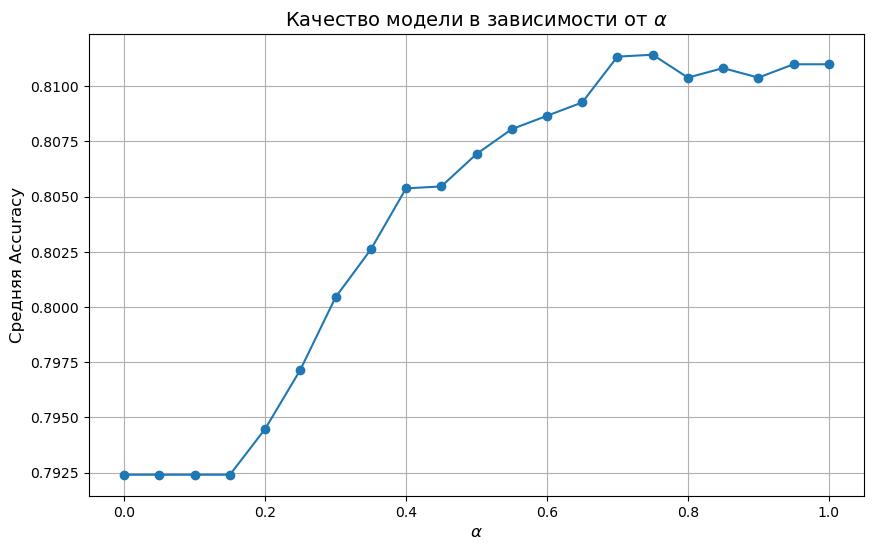

Лучшая alpha: 0.75, Средняя Accuracy: 0.8114


In [55]:
from sklearn.model_selection import StratifiedKFold

clf_1 = RandomForestClassifier(random_state=16, n_estimators=100)
clf_2 = KNeighborsClassifier(n_neighbors=5)  

X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.2, random_state=16)

clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)

alphas = np.linspace(0, 1, 21)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for alpha in alphas:
    blended_predictions = []
    
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        clf_1.fit(X_train_fold, y_train_fold)
        clf_2.fit(X_train_fold, y_train_fold)

        proba_1 = clf_1.predict_proba(X_val_fold)
        proba_2 = clf_2.predict_proba(X_val_fold)
        
        blended_proba = alpha * proba_1 + (1 - alpha) * proba_2
        blended_predictions = np.argmax(blended_proba, axis=1)
        
        score = accuracy_score(y_val_fold, blended_predictions)
        scores.append(score)

mean_scores = [np.mean(scores[i * cv.get_n_splits():(i + 1) * cv.get_n_splits()]) for i in range(len(alphas))]

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_scores, marker='o')
plt.title("Качество модели в зависимости от $\\alpha$", fontsize=14)
plt.xlabel("$\\alpha$", fontsize=12)
plt.ylabel("Средняя Accuracy", fontsize=12)
plt.grid(True)
plt.show()

best_alpha = alphas[np.argmax(mean_scores)]
best_score = max(mean_scores)
print(f"Лучшая alpha: {best_alpha:.2f}, Средняя Accuracy: {best_score:.4f}")

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**Задание 13 (1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберите тот, которых давал наилучшее качество на кросс-валидации (с учетом подобранных гиперпараметров) и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).

Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

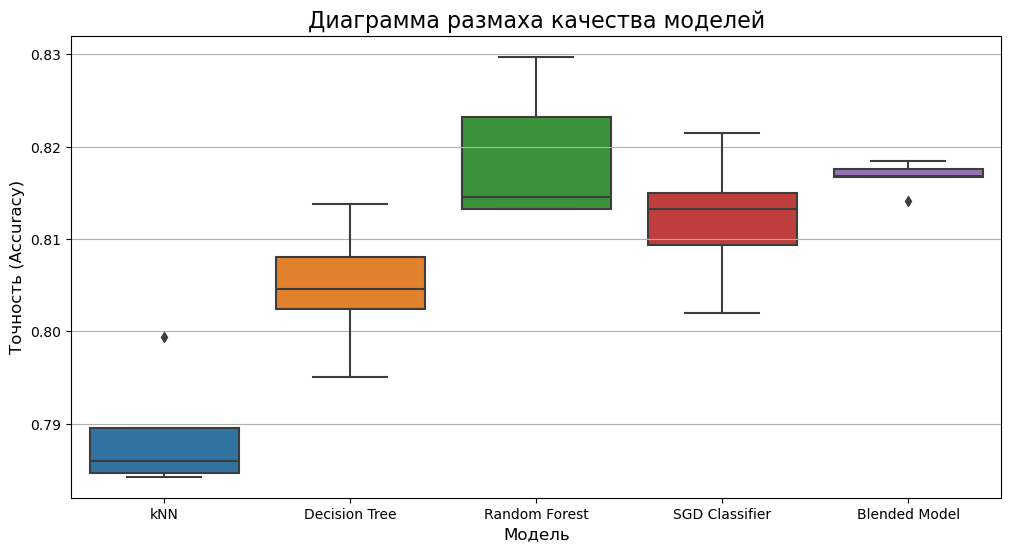

In [59]:
models = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "SGD Classifier": SGDClassifier(max_iter=1000, random_state=42),
    "Blended Model": None  #добавим позже
}

#вот, добавляем
alphas = np.linspace(0, 1, 21)
best_alpha = 0.75 
clf_1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=16)
clf_2 = KNeighborsClassifier(n_neighbors=5)

def blended_model_predict_proba(X, alpha, clf_1, clf_2):
    proba_1 = clf_1.predict_proba(X)
    proba_2 = clf_2.predict_proba(X)
    return alpha * proba_1 + (1 - alpha) * proba_2

results = []

for name, model in models.items():
    if name == "Blended Model":
        scores = []
        for train_idx, val_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            clf_1.fit(X_train_fold, y_train_fold)
            clf_2.fit(X_train_fold, y_train_fold)
            
            blended_proba = blended_model_predict_proba(X_val_fold, best_alpha, clf_1, clf_2)
            blended_pred = np.argmax(blended_proba, axis=1)
            
            scores.append(accuracy_score(y_val_fold, blended_pred))
        results.append(pd.DataFrame({"Model": name, "Accuracy": scores}))
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
        results.append(pd.DataFrame({"Model": name, "Accuracy": scores}))

results_df = pd.concat(results)

plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Accuracy", data=results_df)
plt.title("Диаграмма размаха качества моделей", fontsize=16)
plt.xlabel("Модель", fontsize=12)
plt.ylabel("Точность (Accuracy)", fontsize=12)
plt.grid(axis="y")
plt.show()

Спасибо большое за проверку всех работ! Я многое не понимала под конец и прямо сильно пользовалась ChatGPT( Но я очень хочу разобраться во всем, так что к домашке еще вернусь, просто после декабря и уже чисто для профилактики)